In [126]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Alex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [127]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [128]:
df = pd.read_csv('../../data/telecom_pca.csv')
x = np.array(df.drop(columns=['TARGET']))
y = df['TARGET']

In [129]:
#get K value for K Means
def getK(x):
    scaled_x = x
    distortions = {}
    i = 1
    while True:
        #fit k means clustering according to i
        km = KMeans(
            n_clusters= i, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        ).fit(scaled_x)
        #get distortion of actual k, which is the sum distance between clusters and their centroid
        current_distortion = sum(np.min(cdist(scaled_x, km.cluster_centers_,'euclidean'), axis=1)) / scaled_x.shape[0] 
        distortions[i] = current_distortion
        #getting 3 iterations
        if i >= 3:
            #get slope between i -1 and i - 2, i and i - 1
            m1 = distortions[i - 2] - distortions[i - 1]
            m2 = distortions[i - 1] - distortions[i]
            #get the differential between slopes and addition
            m_dif = m1 - m2
            m_sum = m1 + m2
            #get the percentage representation of differential, since 100% equals to the sum of slope values
            dif_percentage = (m_dif * 100) / m_sum
            print(dif_percentage)
            #if this percentage is less than 25%, it means that  distortion will have a linear behaviour as more k iterations
            #so we can say that a correct k value for optimal clustering is i - 2.
            if dif_percentage < 25.0:
                break
        i += 1
    return i - 2

In [130]:
def makeClusters(n):
    km = KMeans(
        n_clusters= n, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(x)
    cluster_labels = km.labels_
    return km, y_km, cluster_labels

In [131]:
def plotClusters(km,y_km, n):
    # plot the clusters
    for i in range(n):
        plt.scatter(
        x[y_km == i, 0], x[y_km == i, 1],
        c = '#' + str(random.randint(100000,999999)),
        label = 'cluster ' + str(i)
    )
    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

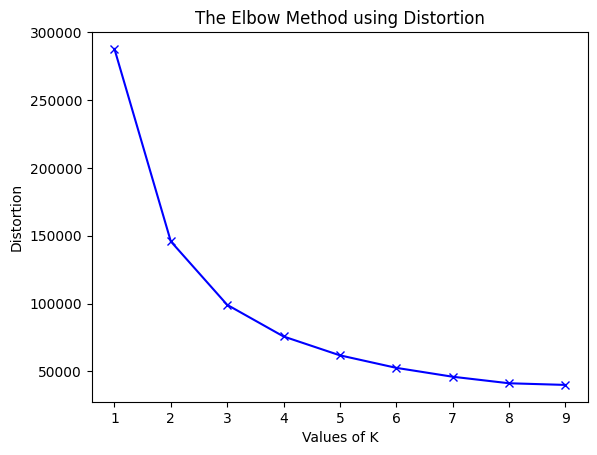

In [132]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
scaled_x = x 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(scaled_x)
  
    distortions.append(sum(np.min(cdist(scaled_x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_x.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(scaled_x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_x.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [133]:
n = getK(x)
print(n)

50.41983031879307
33.44071140721741
25.362676451799256
20.084587899273043
4


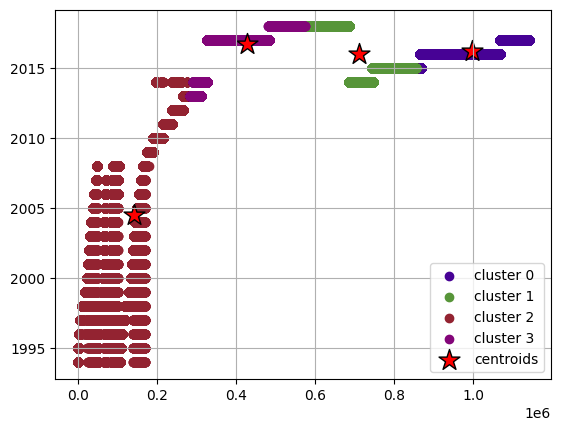

In [134]:
km, y_km, km_labels = makeClusters(n)
plotClusters(km, y_km, n)

In [135]:
clusters = pd.DataFrame(data = {'cluster': y_km})
clusters

,cluster
0,2
1,2
2,2
3,2
4,2
...,...
1140599,0
1140600,0
1140601,0
1140602,0


In [136]:
df_clusters = pd.merge(clusters, df.drop(columns=['TARGET']), left_index=True, right_index=True)
df_clusters = pd.merge(df_clusters, df[['TARGET']], left_index=True, right_index=True)
df_clusters

,cluster,Unnamed: 0,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,...,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL,TARGET
0,2,0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,...,945.040000,1004.070,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0,0
1,2,1,1994,2019,431.082618,486.500000,1,6245.141667,6,4,...,493.815000,159.050,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0,0
2,2,2,1994,2019,50.619644,52.815000,1,1666.488333,2,3,...,50.300000,0.000,0.000,0.000,0.000,0.000,0.000,0.102539,0.0,0
3,2,3,1994,2019,399.710034,422.235000,1,2522.008333,3,4,...,406.586667,288.805,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0,0
4,2,4,1994,2019,612.665844,825.888333,1,1219.961667,0,2,...,751.185000,209.760,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140599,0,1140599,2017,2019,297.752650,313.950000,1,2418.486667,5,4,...,303.166667,0.000,0.000,0.000,0.000,0.000,0.000,307945.957031,0.0,0
1140600,0,1140600,2017,2019,160.663773,178.500000,1,454.116667,0,1,...,170.000000,0.000,0.000,0.000,0.000,0.000,0.000,22647.873535,0.0,0
1140601,0,1140601,2017,2019,570.147016,642.911667,1,615.866667,1,1,...,609.630000,154.150,64.990,3.660,10.050,0.000,0.000,17582.867188,0.0,0
1140602,0,1140602,2017,2019,452.736799,525.413333,2,735.645000,1,2,...,414.840000,218.805,102.075,54.065,7.980,5.350,0.065,3015.338867,0.0,0


In [137]:
#function to show each cluster behaviour according to data, given a pandas dataframe, a number of clusters (same as k means)
#and columns to drop (e.g. user indexes) 
def showClustersInfo(df_clusters, n, columns_to_drop):
    #group dataframe by cluster and get mean of each column
    clusters_plot = df_clusters.drop(columns=columns_to_drop).groupby(by=['cluster']).mean().reset_index()
    print(clusters_plot)
    #pyplot subplots for scatter plot
    fig = make_subplots(rows=n, cols=1, specs = list([[{"type" : "polar"}]] * n), 
    )
    for i in range (0,n):
        cluster_color = '#' + str(random.randint(100000,999999)) #random color
        #plot cluster
        fig.append_trace(
            go.Scatterpolar(
                r = clusters_plot.loc[i].values,
                theta = clusters_plot.columns,
                fill = 'toself',
                name = 'Cluster ' + str(i),
                fillcolor = cluster_color, line = dict(color = cluster_color),
                showlegend = True, opacity = 0.6
            ), row = i + 1, col = 1
        )
    fig.update_layout(height=2000, showlegend=True)

    fig.show()

In [138]:
showClustersInfo(df_clusters, n, ['Unnamed: 0', 'DATA_IN_BNDL'])

   cluster  YEAR_JOINED  CURRENT_YEAR  BILL_AMOUNT  PAID_AMOUNT  \
0        0  2016.208417   2018.924108   343.967913   354.372271   
1        1  2016.019489   2018.947121   355.160761   362.530261   
2        2  2004.542250   2018.978588   462.612064   478.445042   
3        3  2016.757539   2018.939057   362.967821   373.192692   

   PAYMENT_TRANSACTIONS    PARTY_REV  PREPAID_LINES  POSTPAID_LINES  \
0              1.368333  1504.663834       2.073651        3.124434   
1              1.361635  2252.156067       2.322562        5.363406   
2              1.291151  2281.624240       2.232793        4.194062   
3              1.366650  1604.830835       1.949618        3.275698   

   OTHER_LINES    LINE_REV  MOUS_TO_LOCAL_MOBILES  MOUS_FROM_LOCAL_MOBILES  \
0     0.689924  343.222624             389.083270               111.355743   
1     0.980785  367.183707             413.806479               134.136470   
2     1.186812  457.227765             382.422476               162.446703

In [139]:
# sort the dataframe
df_clusters = df_clusters.sort_values(by=['cluster'])
df_clusters

,cluster,Unnamed: 0,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,...,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL,TARGET
1140603,0,1140603,2017,2019,151.659202,200.000000,1,935.358333,2,2,...,155.728333,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.0,0
950261,0,950261,2016,2019,228.764181,245.801667,2,846.121667,3,2,...,241.093333,268.450,255.575,8.650,195.235,248.670,49.315,3296.310059,0.0,0
950260,0,950260,2016,2019,229.811395,230.138333,1,607.300000,1,2,...,219.445000,135.775,3.580,11.440,2.225,1.650,0.000,19568.119141,0.0,0
950259,0,950259,2016,2019,155.490999,168.333333,1,521.256667,1,1,...,161.348333,14.175,0.000,0.000,0.000,133.100,0.000,5133.126465,0.0,0
950258,0,950258,2016,2019,254.612092,265.368333,1,252.813333,0,1,...,252.813333,173.115,5.060,17.835,5.010,0.000,0.000,2600.800781,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380165,3,380165,2017,2019,178.178452,187.961667,1,4113.066667,12,5,...,177.036667,423.175,86.165,14.395,6.015,0.000,0.800,0.000000,0.0,0
380164,3,380164,2017,2019,298.584599,316.693333,1,710.131667,5,2,...,300.000000,0.000,0.000,0.000,0.000,0.000,0.000,22393.065918,0.0,0
380163,3,380163,2017,2019,151.359055,158.870000,1,486.900000,0,2,...,172.881667,41.260,25.980,0.885,69.520,59.275,61.950,1304.917969,0.0,0
380169,3,380169,2017,2019,157.898784,91.666667,1,619.935000,2,1,...,154.166667,0.185,39.195,0.000,26.285,0.000,0.000,1812.685547,0.0,0


In [140]:
df_to_csv = df_clusters[df_clusters['cluster'] == 0]
df_to_csv
for i in range (n):
    df_to_csv = df_clusters[df_clusters['cluster'] == i]
    df_to_csv.to_csv('../../data/clusters/telecom_pca_cluster_'+str(i)+'.csv')